## Boston Housing Price prediction
Regression sample

In [1]:
from keras.datasets import boston_housing  # Doc at https://keras.io/datasets/. Downloaded archive in ~/.keras/datasets/boston_housing.npz

Using TensorFlow backend.


### Loading the data
Summary of the data, found [here](http://rstudio-pubs-static.s3.amazonaws.com/368819_35c07fc9852a47389a2d64685f88fec4.html)
```
##       crim                zn             indus            chas        
##  Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
##  1st Qu.: 0.08354   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
##  Median : 0.25372   Median :  0.00   Median : 8.56   Median :0.00000  
##  Mean   : 3.68856   Mean   : 11.38   Mean   :11.14   Mean   :0.06931  
##  3rd Qu.: 3.54343   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
##  Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
##       nox              rm             age              dis        
##  Min.   :0.385   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
##  1st Qu.:0.449   1st Qu.:5.883   1st Qu.: 43.62   1st Qu.: 2.106  
##  Median :0.532   Median :6.189   Median : 79.05   Median : 3.158  
##  Mean   :0.554   Mean   :6.273   Mean   : 68.74   Mean   : 3.819  
##  3rd Qu.:0.624   3rd Qu.:6.597   3rd Qu.: 94.35   3rd Qu.: 5.287  
##  Max.   :0.871   Max.   :8.725   Max.   :100.00   Max.   :12.127  
##       rad              tax           ptratio          black       
##  Min.   : 1.000   Min.   :187.0   Min.   :12.60   Min.   :  0.32  
##  1st Qu.: 4.000   1st Qu.:280.5   1st Qu.:17.23   1st Qu.:376.09  
##  Median : 5.000   Median :330.0   Median :19.10   Median :391.44  
##  Mean   : 9.483   Mean   :406.7   Mean   :18.46   Mean   :358.84  
##  3rd Qu.:24.000   3rd Qu.:666.0   3rd Qu.:20.20   3rd Qu.:396.25  
##  Max.   :24.000   Max.   :711.0   Max.   :22.00   Max.   :396.90  
##      lstat             medv      
##  Min.   : 1.730   Min.   : 5.00  
##  1st Qu.: 7.135   1st Qu.:17.10  
##  Median :11.570   Median :21.20  
##  Mean   :12.820   Mean   :22.63  
##  3rd Qu.:17.225   3rd Qu.:25.02  
##  Max.   :37.970   Max.   :50.00
```

In [2]:
data_labels = ["crim", "zn", "indus", "chas", "nox", "rm", "age", 
               "dis", "rad", "tax", "ptratio", "black", "lstat", "medv"]

In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [4]:
train_data.shape
train_targets.shape
print("len(train_data): {}".format(len(train_data)))
print("len(train_data[0]): {}".format(len(train_data[0])))
for i in range(len(train_data[0])):
    print("Index {}, {} => {}".format(i, data_labels[i], train_data[0][i]))
    
print("\n\tFor the input (train) data above, the target was {}.\n".format(train_targets[0]))    
print("Sample:")
train_data[0:]
# train_data[0:0].median()
# TODO What does each column mean???

# For info, calculate avg target
acc = 0
for i in range(len(train_targets)):
    acc += train_targets[i]
print("Acc={}, Avg:{}".format(acc, acc / len(train_targets)))

len(train_data): 404
len(train_data[0]): 13
Index 0, crim => 1.23247
Index 1, zn => 0.0
Index 2, indus => 8.14
Index 3, chas => 0.0
Index 4, nox => 0.538
Index 5, rm => 6.142
Index 6, age => 91.7
Index 7, dis => 3.9769
Index 8, rad => 4.0
Index 9, tax => 307.0
Index 10, ptratio => 21.0
Index 11, black => 396.9
Index 12, lstat => 18.72

	For the input (train) data above, the target was 15.2.

Sample:
Acc=9047.6, Avg:22.395049504950496


In [5]:
test_data.shape

(102, 13)

In [6]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

In [7]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

#### Building the network

In [8]:
from keras import models
from keras import layers

# Because we'll need to instanciate the same model multiple times
# we use here a function to build it
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # Mean Absolute Error
    return model

### K-fold validation

In [11]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k  # // is floor
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #{}'.format(i))
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]], 
        axis=0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]], 
        axis=0)
        
    model = build_model()  # Then invoke above
    model.fit(partial_train_data, partial_train_targets,
             epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    print('\tFold #{} completed'.format(i))

print("K-Fold validation ({} folds) completed.".format(k))

processing fold #0
	Fold #0 completed
processing fold #1
	Fold #1 completed
processing fold #2
	Fold #2 completed
processing fold #3
	Fold #3 completed
K-Fold validation (4 folds) completed.


In [12]:
all_scores

[2.089223623275757, 2.802062749862671, 2.8712351322174072, 2.4326043128967285]

In [13]:
np.mean(all_scores)

2.548781454563141

#### Saving validation at each fold

In [18]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #{}'.format(i))
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]], 
        axis=0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]], 
        axis=0)
        
    model = build_model()  # Invoke then above
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    # val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    # print("history.history: {}".format(history.history))
    if 'val_mean_absolute_error' in history.history:
        mae_history = history.history['val_mean_absolute_error']  # Gone is the last version?
    else:
        print("Using val_loss...")
        mae_history = history.history['val_loss']
    all_mae_histories.append(mae_history)
    print('\tFold #{} completed'.format(i))

print("K-Fold validation ({} folds) completed.".format(k))

processing fold #0
	Fold #0 completed
processing fold #1
	Fold #1 completed
processing fold #2
	Fold #2 completed
processing fold #3
	Fold #3 completed
K-Fold validation (4 folds) completed.


In [19]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

# average_mae_history

### Now plot

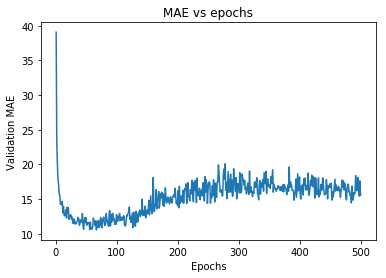

In [21]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title('MAE vs epochs')
# plt.legend()
plt.show()

### Excluding 10 first points

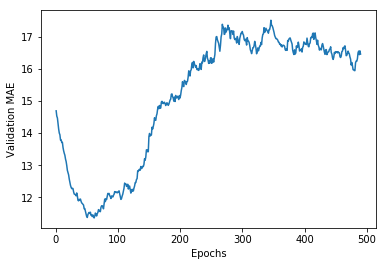

In [22]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
# plt.legend()
plt.show()

### Training then final model, epochs=80

In [23]:
model = build_model()
model.summary()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print("\n>> TEST Mean Absolute Error: ${:0.2f}".format(test_mae_score * 1000))

model.save('housing.h5')
print("Model was saved")

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_56 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
102/102 [==============================] - 0s 221us/step

>> TEST Mean Absolute Error: $2638.66
Model was saved


#### Other resources
- [Allen Reyes](http://allan.reyes.sh/mlnd-boston-housing/)
- [olegleyz](https://olegleyz.github.io/boston_housing.html)
- [RStudio](http://rstudio-pubs-static.s3.amazonaws.com/368819_35c07fc9852a47389a2d64685f88fec4.html), this one explains what the data are


#### Try a prediction
On first train_data, expecting first train_target.

In [24]:
# input_data = np.array([[1.23247, 0.0, 8.14, 0.0, 0.538, 6.142, 91.7, 3.9769, 4.0, 307.0, 21.0, 396.9, 18.72]])
input_data = np.array([train_data[0]])
print("Input data shape: {}\n{}".format(input_data.shape, input_data))
prediction = model.predict(input_data)
print("Prediction: shape:{}, {}".format(prediction.shape, prediction))
print("Predicted: {:0.2f}".format(prediction[0][0]))
diff = train_targets[0] - prediction[0][0]
print("Expected: {:0.2f}, error {:0.2f}%".format(train_targets[0], 100 * (diff / train_targets[0])))

Input data shape: (1, 13)
[[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
   0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
   0.8252202 ]]
Prediction: shape:(1, 1), [[16.13109]]
Predicted: 16.13
Expected: 15.20, error -6.13%
